# Describing and analyzing time series

<!--
In what follows the library **pandas-datareader** is needed. It is not included in the standard package of Anaconda installation.
-->

<!--
You can install a new library in the following way.
- Open Anaconda Navigator and choose **Environments**.
- If **pandas-datareader** is not found in the list of **Installed**, select the list **Not installed**.
- If **pandas-datareader** is not in this list either, update the list (**Update index**).
- Choose **pandas-datareader** and in the bottom of the window select **Apply**. 
-->

The following requires the **yfinance** library, which is not part of the standard Anaconda installation. You can install it from the command line  (Windows: Anaconda Prompt, macOS: Terminal) using the command

$$\textrm{conda install -c conda-forge yfinance}$$

Now we fetch data and describe and analyze time series.

In [1]:
### Bring the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The following library is needed to fetch data from the Yahoo Finance service
### Make sure the library is installed as it is not included in the standard installation.

### An alternative way for fetching data from Yahoo Finance; unfortunately not workin at the moment
#import pandas_datareader.data as web

### For fetching data from Yahoo Finance
import yfinance as yf

### Style affects on layout of graphics
### Available styles can be listed as plt.style.available

sns.set_style('darkgrid')

### Downloading data

We can download Elisa and Telia historical stock prices from the Yahoo Finance service. Stock prices listed in the service can be found using internet searches. For instance, typing "yahoo finance kemira" Kemira Oyj stock prices and its name on the service is found.

In [2]:
### Open the data in the dataframes named correspondingly.

elisa = yf.download('ELISA.HE', start = '2018-1-1')
telia = yf.download('TELIA1.HE', start = '2018-1-1')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
elisa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,25.996548,357134
2018-01-03,32.840000,33.070000,32.599998,32.689999,25.862053,348571
2018-01-04,32.770000,32.820000,32.660000,32.750000,25.909523,430650
2018-01-05,32.750000,32.970001,32.680000,32.910000,26.036104,443343
2018-01-08,32.930000,33.320000,32.930000,33.060001,26.154776,383662
...,...,...,...,...,...,...
2023-04-19,54.279999,54.799999,54.099998,54.680000,54.680000,289486
2023-04-20,53.599998,55.459999,53.000000,55.180000,55.180000,326808
2023-04-21,55.180000,55.959999,55.180000,55.560001,55.560001,280745


In [4]:
telia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,3.750,3.752,3.718,3.729,0.077299,1717521
2018-01-03,3.758,3.758,3.730,3.755,0.077838,1823437
2018-01-04,3.760,3.786,3.756,3.780,0.078356,1540541
2018-01-05,3.780,3.850,3.777,3.850,0.079807,1306020
2018-01-08,3.850,3.860,3.824,3.845,0.079703,2151101
...,...,...,...,...,...,...
2023-04-19,2.343,2.387,2.342,2.380,2.380000,942860
2023-04-20,2.364,2.387,2.353,2.362,2.362000,652925
2023-04-21,2.364,2.369,2.353,2.363,2.363000,587029


### Line charts

Next draw some line charts using the data just fetched. Notice that you always have the most recent data available and therefore also charts.

Text(0, 1, 'Euros')

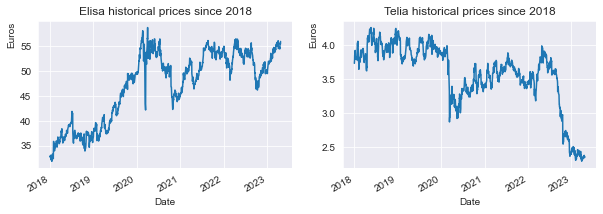

In [5]:
### Plot Elisa's and Telia's historical prices, use daily closing prices.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].plot(ax=axs[0])
telia['Close'].plot(ax=axs[1])

### Add title and vertical axis-titles

axs[0].set_title('Elisa historical prices since 2018')
axs[1].set_title('Telia historical prices since 2018')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')


Text(0, 1, 'Euros')

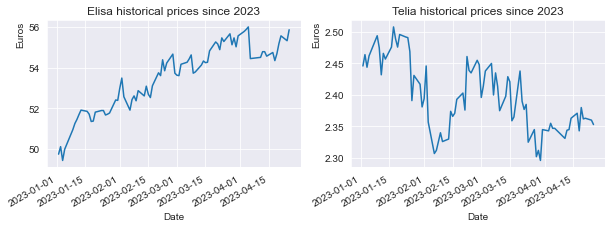

In [6]:
### Plot from the beginning of 2023

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close']['2023':].plot(ax=axs[0])
telia['Close']['2023':].plot(ax=axs[1])

### Add title and axis-titles

axs[0].set_title('Elisa historical prices since 2023')
axs[1].set_title('Telia historical prices since 2023')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')


### Aggregation

We can use **resample()** in order to aggregate a time series from one level to another, e.g. from daily series to monthly series.

Parameters for the function resample() that can be used can be found at:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In the following there are examples of aggregation. Notice that in all of them the previous data with historical daily stock prices is used.

Text(0, 1, 'Euros')

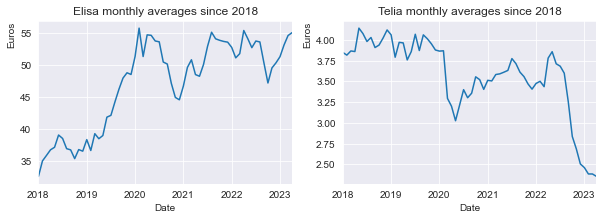

In [7]:
### Calculate monthly average prices using the previous daily data.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('M').mean().plot(ax=axs[0])
telia['Close'].resample('M').mean().plot(ax=axs[1])

### Add title and axis-titles

axs[0].set_title('Elisa monthly averages since 2018')
axs[1].set_title('Telia monthly averages since 2018')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

Text(0, 1, 'Euros')

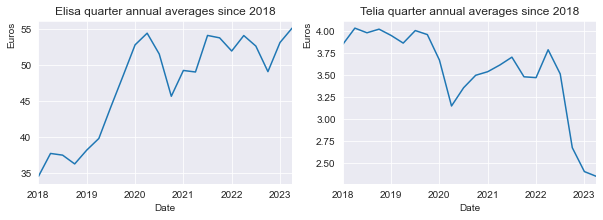

In [8]:
### Quarter annual average prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('Q').mean().plot(ax=axs[0])
telia['Close'].resample('Q').mean().plot(ax=axs[1])

### Add title and axis-titles

axs[0].set_title('Elisa quarter annual averages since 2018')
axs[1].set_title('Telia quarter annual averages since 2018')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

Text(0, 1, 'Euros')

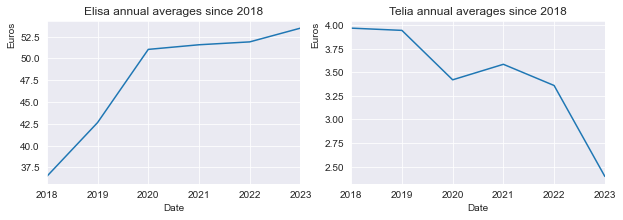

In [9]:
### Annual mean prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('Y').mean().plot(ax=axs[0])
telia['Close'].resample('Y').mean().plot(ax=axs[1])

### Add title and axis-titles

axs[0].set_title('Elisa annual averages since 2018')
axs[1].set_title('Telia annual averages since 2018')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

Text(0, 0.5, 'Millions of shares')

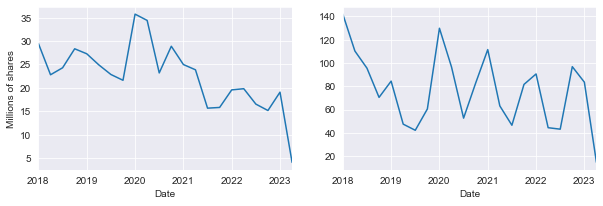

In [10]:
### The number of volume quarter annually (aggregate by addition)
### There may be a sudden drop in the last quarter if the quarter is only beginning

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(elisa['Volume']/1000000).resample('Q').sum().plot(ax=axs[0])
(telia['Volume']/1000000).resample('Q').sum().plot(ax=axs[1])
axs[0].set_ylabel('Millions of shares')

### Moving averages

Moving averages are used to smooth down isolated price spikes.

In stock markets' technical analysis intersection points of time series and their moving averages have <a href="https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp">special interests</a>. 

<AxesSubplot:xlabel='Date'>

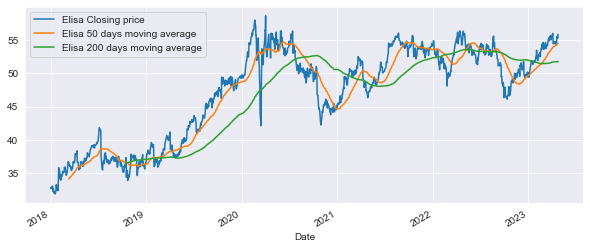

In [11]:
### Consider Elisa's stock markets and daily closing values

elisa['Close'].plot(figsize=(10,4), legend=True, label = 'Elisa Closing price')

### Add 50 and 200 days moving averages to the line chart

elisa['Close'].rolling(50).mean().plot(legend = True, label = 'Elisa 50 days moving average')
elisa['Close'].rolling(200).mean().plot(legend = True, label = 'Elisa 200 days moving average')


<AxesSubplot:xlabel='Date'>

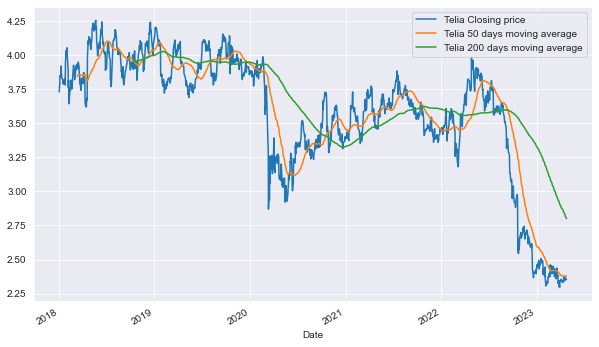

In [12]:
### Consider Telia's stock markets and daily closing values

telia['Close'].plot(figsize=(10,6), legend=True, label = 'Telia Closing price')

### Add 50 and 200 days moving averages to the line chart

telia['Close'].rolling(50).mean().plot(legend = True, label = 'Telia 50 days moving average')
telia['Close'].rolling(200).mean().plot(legend = True, label = 'Telia 200 days moving average')


How would you analyze the development of the stock price? Can you identify any signs of golden cross or death cross? If so, what would be the menaing of the found cross? See, e.g. <a href="https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp">Investopedia's article</a> about this for more information.

## Percentages of changes

It's convinient to calculate percentages of changes using the function **pct_change()**.

In [13]:
### Changes of stock prices from the previous day as percentages

elisa['Elisa-daily%'] = elisa['Close'].pct_change()
telia['Telia-daily%'] = telia['Close'].pct_change()

In [14]:
### Dataframes elisa and telia now have a new column
elisa

,Open,High,Low,Close,Adj Close,Volume,Elisa-daily%
Date,,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,25.996548,357134,NaN
2018-01-03,32.840000,33.070000,32.599998,32.689999,25.862053,348571,-0.005174
2018-01-04,32.770000,32.820000,32.660000,32.750000,25.909523,430650,0.001835
2018-01-05,32.750000,32.970001,32.680000,32.910000,26.036104,443343,0.004885
2018-01-08,32.930000,33.320000,32.930000,33.060001,26.154776,383662,0.004558
...,...,...,...,...,...,...,...
2023-04-19,54.279999,54.799999,54.099998,54.680000,54.680000,289486,0.006257
2023-04-20,53.599998,55.459999,53.000000,55.180000,55.180000,326808,0.009144
2023-04-21,55.180000,55.959999,55.180000,55.560001,55.560001,280745,0.006887


In [15]:
### Next add percentage changes into a same dataframe

changes = pd.concat([elisa['Elisa-daily%'], telia['Telia-daily%']], axis = 1)

### In case there are missing values in closing prices (no sales is done), that results in missing values in percentages of changes as well.
### These missing values can be replaced by a zero percentage of change using the function fillna as follows:

changes = changes.fillna(0)

### See the result

changes


,Elisa-daily%,Telia-daily%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,-0.005174,0.006972
2018-01-04,0.001835,0.006658
2018-01-05,0.004885,0.018519
2018-01-08,0.004558,-0.001299
...,...,...
2023-04-19,0.006257,0.015792
2023-04-20,0.009144,-0.007563
2023-04-21,0.006887,0.000423


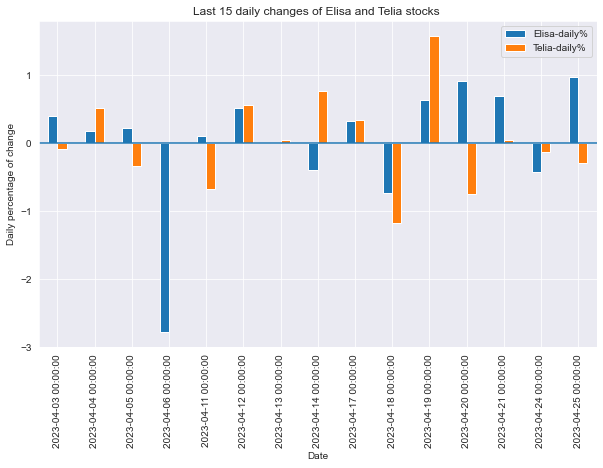

In [16]:
### Display the last 15 changes

(changes[-15:]*100).plot.bar(figsize=(10, 6))

### Vertical axis title
plt.ylabel('Daily percentage of change')

### Add a horisontal line at zero

plt.title('Last 15 daily changes of Elisa and Telia stocks ')

plt.axhline()

In [17]:
### Statistical numbers for percentages of changes

(changes*100).describe().round(2)

,Elisa-daily%,Telia-daily%
count,1336.00,1336.00
mean,0.05,-0.02
std,1.39,1.46
min,-9.22,-13.45
25%,-0.59,-0.69
50%,0.08,0.03
75%,0.76,0.73
max,16.40,11.00


<AxesSubplot:>

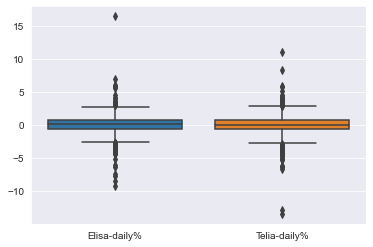

In [18]:
### comparison of percentages of change graphically;

sns.boxplot(data = changes*100)

Next we find the days when the percentage of change has been greater than six per cent.

In [19]:

changes[(abs(changes['Elisa-daily%']) > 0.06) | (abs(changes['Telia-daily%']) > 0.06)]

,Elisa-daily%,Telia-daily%
Date,,
2018-04-20,-0.001125,0.083107
2018-07-13,-0.092226,-0.009455
2018-10-18,-0.074751,-0.000496
2019-04-04,-0.063350,-0.007843
2019-10-17,0.068757,-0.062849
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963


## Correlation between percentages of changes

Percentages of changes of Elisa and Telia have a positive correlation.

In [20]:
### Calculate correlations

changes.corr()

,Elisa-daily%,Telia-daily%
Elisa-daily%,1.000000,0.463431
Telia-daily%,0.463431,1.000000


<AxesSubplot:xlabel='Elisa-daily%', ylabel='Telia-daily%'>

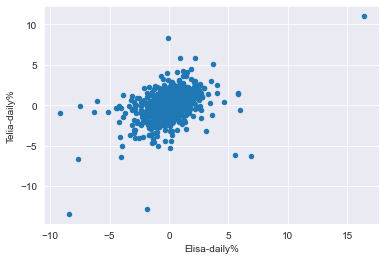

In [21]:
### Positive correlation between percentages of changes can be seen in the scatter chart

(changes*100).plot.scatter(x = 'Elisa-daily%', y = 'Telia-daily%')

<AxesSubplot:xlabel='Date'>

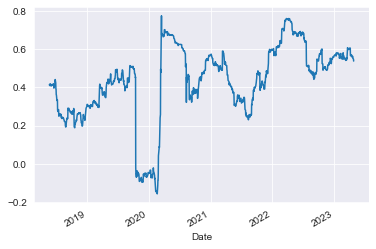

In [22]:
### Moving correlation describes how percentages of changes correlate at different times

changes['Elisa-daily%'].rolling(100).corr(changes['Telia-daily%']).plot()

## Moving volatility

Volatility describes the overall risk of a stock. It is announced as annual if the observation period is at least one year.

When calculating volatility standard deviation (std()) of percentage numbers of daily changes is determined and then it is transform to be annual when the deviation is multiplied by a square root of a factor that depends on the ratio of observation and destination data. In the following example this factor is assumed to be 254.

Moving volatility describes how volatility (i.e., risk) has changed over the time.

<AxesSubplot:xlabel='Date'>

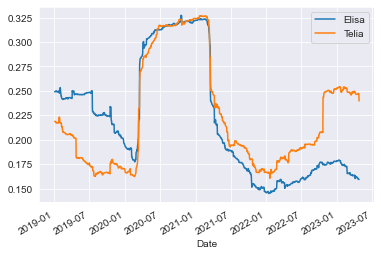

In [23]:
### Examples of moving volatility of 252 days

### Elisa stock
(changes['Elisa-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Elisa', legend = True)

### Telia stock
(changes['Telia-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Telia', legend = True)

## Line charts with two axis

Elisa and Telia stock prices are of different order. They can be drawn in one chart if two axes are used. 

Text(0.5, 1.0, 'Elisa and Telia share prices development')

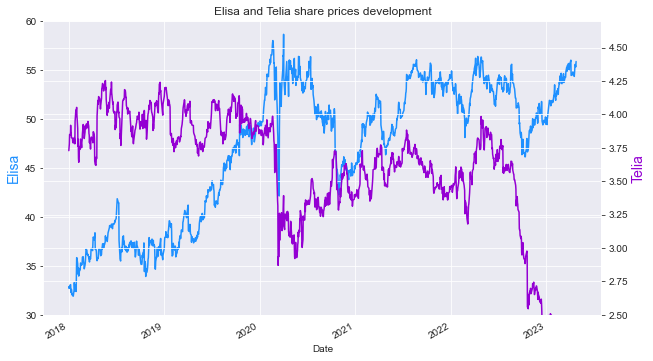

In [24]:
### Figure size

plt.figure(figsize=(10,6))

### Line chart of Elisa stocks closing prices.

axe = elisa['Close'].plot(color = 'dodgerblue')

### Add name for Elisa, colour and font size.

plt.ylabel('Elisa', color = 'dodgerblue', fontsize = 14)

### Scale the value axis of Elisa

plt.ylim(30, 60)

### Next we create another axes object (called axt) and determine it to have a common x-axis with the object axe.

axt = axe.twinx()

### Line chart of Telia stock closing prices

telia['Close'].plot(ax = axt, color ='darkviolet')

### Add name for Telia, colour and font size.

plt.ylabel('Telia', color = 'darkviolet', fontsize = 14)

### Scale the value axis of Telia

plt.ylim(2.5, 4.7)

### Chart title

plt.title('Elisa and Telia share prices development')


## Is there a connection between weekdays and profit rate?

In [25]:
### Add weekdays to a column of their own (zero = Monday)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

changes['Weekday'] = changes.index.weekday

### Elisa's statistical numbers by weekdays

elisa_weekday = changes.groupby('Weekday')['Elisa-daily%'].describe()
elisa_weekday.index = weekdays

elisa_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,266.0,0.002293,0.011658,-0.040785,-0.004502,0.002336,0.009188,0.057805
Tue,272.0,0.000713,0.015432,-0.038976,-0.006053,0.000685,0.007048,0.164016
Wed,272.0,0.001275,0.012139,-0.038680,-0.005067,0.000750,0.008157,0.059656
Thu,267.0,-0.001341,0.015075,-0.084077,-0.007773,-0.000371,0.006252,0.068757
Fri,259.0,-0.000515,0.014617,-0.092226,-0.005429,0.001013,0.007733,0.036016


In [26]:
### Telia's statistical numbers by weekdays

telia_weekday = changes.groupby('Weekday')['Telia-daily%'].describe()
telia_weekday.index = weekdays

telia_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,266.0,0.001021,0.013348,-0.064356,-0.006015,0.001141,0.008383,0.041424
Tue,272.0,0.001116,0.014219,-0.044921,-0.005918,0.000555,0.007325,0.109976
Wed,272.0,-0.000056,0.013436,-0.061963,-0.007071,-0.000610,0.007507,0.058433
Thu,267.0,-0.002454,0.015418,-0.134499,-0.008020,-0.000248,0.004946,0.051014
Fri,259.0,-0.000857,0.016021,-0.128406,-0.006907,0.000517,0.007224,0.083107


How would you answer to the question raised above, based on these figures?

Next we perform statistical tests whether there are statistically significances difference between percentages of changes of certain days.

In [27]:
### First test is applied to percentages of change of Elisa shares
### Test whether there is statistically significant difference between Monday and Thursday

### Form the groups to be compared

earlier_day = changes['Elisa-daily%'][changes['Weekday']==0]
later_day = changes['Elisa-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.1142974964952805, pvalue=0.0019495430845453423)

In [28]:
### The second test is applied to percentages of change of Telia shares
### Test whether there is statistically significant difference between Tuesday and Thursday

### Form the groups to be compared

earlier_day = changes['Telia-daily%'][changes['Weekday']==1]
later_day = changes['Telia-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=2.7926789992600027, pvalue=0.0054156099485905135)

How would you comment the questions about statistically significance raised above, based on these calculations?

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [29]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-04-25 21:38 by Juha Nurmonen
